## 0. 목차

1. tensor와 rank
2. tensorflow의 변수 선언
3. tensorflow methods (변수 다루기)
4. 선형 회귀 모델 구현

## 1. tensor와 rank
- 텐서(tensor) : 스칼라, 벡터, 행렬이 일반화된 것
- 랭크(rank) : 텐서의 차원

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
# t1, t2, t3 텐서(변하지 않음) 정의
t1 = tf.constant(3)
t2 = tf.constant([1,2,3,4])
t3 = tf.constant([[1,2], [3,4]])

# 랭크 구하기
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

# 크기 구하기 n * m
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()

print(type(t1))
print(t1.numpy())
print(t2)
print(t2.numpy()) # numpy()는 tf.Tensor의 첫 번째 element 또는 tf.Variable의 numpy 매개변수를 꺼낼 때 사용
print(type(r1))
print(r1)
print('랭크:', r1.numpy(), r2.numpy(), r3.numpy())
print('크기:', s1, s2, s3)

<class 'tensorflow.python.framework.ops.EagerTensor'>
3
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
[1 2 3 4]
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(0, shape=(), dtype=int32)
랭크: 0 1 2
크기: () (4,) (2, 2)


In [6]:
arr = np.array([[1., 2., 3., 3.5],
               [4., 5., 6., 6.5],
               [7., 8., 9., 9.5]])
t1 = tf.constant(arr)
print(t1)
s = t1.get_shape()

print('\n', type(s))
print('t1의 크기 : ', s)
print('\n', type(t1.shape))
print('t1의 크기 : ', t1.shape)

t2 = tf.Variable(np.random.normal(size=s))
print('\n', type(t2))
print(t2)                        # s = (3, 4)
t3 = tf.Variable(np.random.normal(size=s[0])) # shqpe나 get_shape()의 반환값을 인덱스로 접근 가능
print('\n', t3.numpy())

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)

 <class 'tensorflow.python.framework.tensor_shape.TensorShape'>
t1의 크기 :  (3, 4)

 <class 'tensorflow.python.framework.tensor_shape.TensorShape'>
t1의 크기 :  (3, 4)

 <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[ 0.01368775, -0.64371324,  0.07459327,  0.03886867],
       [ 1.38113735, -1.10343232,  1.19633345,  0.92566879],
       [ 0.00213338, -1.46271726,  0.26427025,  0.25825512]])>

 [-0.71630322 -0.58920561  0.49321725]


## 2. tensorflow의 변수 선언

- 텐서플로우에서 변수는 특별한 종류의 텐서 객체이다. 
- 훈련 과정 동안 모델 파라미터를 저장하고 업데이트할 수 있다.
- 변수를 정의할 때 초기 텐서 값을 지정해 주어야 한다.

In [7]:
# 변수 정의 방법
# tf.Variable( <initial-value> , name=<optional-name> )
w = tf.Variable(np.array([[1, 2, 3, 4], 
                          [5, 6, 7, 8]]), name='w')
print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int32, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [8]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
# 이름은 같지만 element들이 다르다
a = tf.Variable(my_tensor, name="Mark")
b = tf.Variable(my_tensor + 1, name="Mark")

print(a == b)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


* tf.constant([1,2])는 상수 // tf.Variable([1,2])는 변수

## 3. tensorflow methods (변수 다루기)

In [9]:
# 0~17 범위의 숫자를 랭크 3 텐서, 즉 3차원 배열(3 * 2 * 3)에 할당 
arr = np.arange(18).reshape(3,2,3)
print(type(arr))

<class 'numpy.ndarray'>


### 3.1 tf.reshape

In [10]:
# 텐서 크기를 바꿈  ** tf.reshape의 반환 타입은 tf.constant(상수)이다 **  
new_arr = tf.reshape(arr, shape=(6, -1))
print(type(new_arr))
print(new_arr)
# new_arr1 대신에 new_arr쓰면 오류 뜸
new_arr1 = tf.reshape(arr, shape=(3,3,2))
print('\n', new_arr1)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]], shape=(6, 3), dtype=int32)

 tf.Tensor(
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]], shape=(3, 3, 2), dtype=int32)


### 3.2 tf.transpose

In [11]:
# transpose
before_transpose = tf.constant(np.arange(30).reshape(2,3,5))
print(before_transpose)
after_transpose = tf.transpose(before_transpose, perm=[2, 1, 0]) #  reshape(5, 3, 2) -> 숫자 위치는 바꿔도 숫자 자체는 못바꿈
print(after_transpose)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32)
tf.Tensor(
[[[ 0 15]
  [ 5 20]
  [10 25]]

 [[ 1 16]
  [ 6 21]
  [11 26]]

 [[ 2 17]
  [ 7 22]
  [12 27]]

 [[ 3 18]
  [ 8 23]
  [13 28]]

 [[ 4 19]
  [ 9 24]
  [14 29]]], shape=(5, 3, 2), dtype=int32)


### 3.3 tf.split

In [12]:
# split
before_split = tf.constant(np.arange(30).reshape(2,3,5))
after_split1 = tf.split(before_split, num_or_size_splits=2, axis=0) # 2 * 3 * 5 를 1 * 3 * 5의 동일한 크기 두 개로 나눔
after_split2 = tf.split(before_split, num_or_size_splits=[2, 3], axis=2) # 2 * 3 * 5 를 2*3*2, 2*3*3 로 나눔
print(after_split1)
print('\n', after_split2)
print('\n', after_split2[0])
print('\n', after_split2[1])

[<tf.Tensor: shape=(1, 3, 5), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]]])>, <tf.Tensor: shape=(1, 3, 5), dtype=int32, numpy=
array([[[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])>]

 [<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[ 0,  1],
        [ 5,  6],
        [10, 11]],

       [[15, 16],
        [20, 21],
        [25, 26]]])>, <tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[ 2,  3,  4],
        [ 7,  8,  9],
        [12, 13, 14]],

       [[17, 18, 19],
        [22, 23, 24],
        [27, 28, 29]]])>]

 tf.Tensor(
[[[ 0  1]
  [ 5  6]
  [10 11]]

 [[15 16]
  [20 21]
  [25 26]]], shape=(2, 3, 2), dtype=int32)

 tf.Tensor(
[[[ 2  3  4]
  [ 7  8  9]
  [12 13 14]]

 [[17 18 19]
  [22 23 24]
  [27 28 29]]], shape=(2, 3, 3), dtype=int32)


### 3.4 tf.concat

In [13]:
# concat
t1 = tf.ones(shape=(5,1), dtype=tf.float32)
t2 = tf.zeros(shape=(5,1), dtype=tf.float32)
after_concat1 = tf.concat([t1,t2], axis=0)
after_concat2 = tf.concat([t1,t2], axis=1)
print(after_concat1)
print(after_concat2)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


### 3.5 사칙 연산

In [14]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]])

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [15]:
print(a + b, "\n")  
print(a * b, "\n")  
print(a @ b, "\n") # 행렬곱

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [16]:
# 각 열의 합을 계산
sum_col = tf.reduce_sum(new_arr, axis=0) # axis: 축소될 차원을 지정 
print('\n', type(sum_col))
# 각 행의 합을 계산
sum_row = tf.reduce_sum(new_arr, axis=1)
# 각 열의 평균을 계산
mean_col = tf.reduce_mean(new_arr, axis=0)

a = tf.reduce_sum(new_arr) # axis 매개변수의 기본값은 None으로, 모든 차원을 축소해 스칼라(rank 0인 텐서)를 반환
print(a)

print('\n입력 크기: ', arr.shape)
print('크기가 변경된 입력:\n', new_arr.numpy())
print('열의 합:\n ', sum_col.numpy())
print('행의 합:\n', sum_row.numpy())
print('열의 평균:\n', mean_col.numpy())


 <class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(153, shape=(), dtype=int32)

입력 크기:  (3, 2, 3)
크기가 변경된 입력:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]
열의 합:
  [45 51 57]
행의 합:
 [ 3 12 21 30 39 48]
열의 평균:
 [7 8 9]


In [17]:
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])

# 모두 같은 계산
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [18]:
# 3x1 1x5의 행렬곱 (확장, 브로드캐스팅)
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [19]:
# 같은 크기 행렬의 곱
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)
print(tf.multiply(x_stretch, y_stretch))

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)
tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


### 3.6 기타

In [20]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# 가장 큰 값 찾음
print(tf.reduce_max(c))
# 가장 큰 값의 인덱스 찾음
print(tf.argmax(c))
# Softmax는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수
# Softmax 연산 수행
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


In [21]:
# tf.constant 배열 자료형과 숫자 더하기 연산 가능
new_arr2 = new_arr1 + 1 # new_arr2 의 type도 tf.constant
print('\n', type(new_arr2))
print(new_arr2)

#tf.variable 자료형의 데이터를 바꿀 때 assign()을 이용
new_arr3 = tf.Variable(new_arr1)
new_arr3.assign(new_arr3 + 1)
print(new_arr3)
print('assign 이용 : ', type(new_arr3))

# assign을 이용하지 않는 경우 tf,constant 자료형이 됨
new_arr3 = new_arr3 - 1
print(new_arr3)
print('assign 이용X : ',type(new_arr3))


 <class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]]], shape=(3, 3, 2), dtype=int32)
<tf.Variable 'Variable:0' shape=(3, 3, 2) dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16],
        [17, 18]]])>
assign 이용 :  <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
tf.Tensor(
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]], shape=(3, 3, 2), dtype=int32)
assign 이용X :  <class 'tensorflow.python.framework.ops.EagerTensor'>


In [22]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
# : 를 이용해 원하는 정보 추출 가능
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



In [23]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)
print(ragged_tensor.shape)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>
(4, None)


In [24]:
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
print(tensor_of_strings)
print(tf.strings.split(scalar_string_tensor, sep=" "))
print(tf.strings.split(tensor_of_strings))

tf.Tensor(b'Gray wolf', shape=(), dtype=string)
tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)
tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)
<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


In [25]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


In [26]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [27]:
# Sparse tensor는 메모리 효율적으로 데이터를 저장한다.
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# spaerse tensor를 dense tensor로 변환
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


## 4. 선형 회귀 모델 구현

입력 x에서 출력 y를 예측하는 선형 회귀 모델 구현

In [28]:
# 훈련 샘플 10개인 1차원 데이터셋
x_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])
w = tf.Variable(tf.zeros(shape=(1,)))
print(w.numpy())

[0.]


In [29]:
# 모델 클래스 정의
class TfLinreg(object):
    def __init__(self, learning_rate=0.01):
        ## 가중치와 절편을 정의
        self.w = tf.Variable(tf.zeros(shape=(1))) # 0으로 채워진 크기가 (1,)인 배열 [0.]로 w를 초기화
        self.b = tf.Variable(tf.zeros(shape=(1)))
        # Stochastic Gradient Descent(확률적 경사 하강법)을 통해 가중치 업데이트
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
    
    def fit(self, x, y, num_epoches=10):
        # lose / cost function의 값을 저장하기 위한 리스트 정의
        training_costs = []
        for step in range(num_epoches):
            # train 가능한 변수들을 추적해 기록 남김
            with tf.GradientTape() as tape:
                z_net = self.w * x + self.b
                z_net = tf.reshape(z_net, [-1])
                
                # Ordinary Least Squares(최소 제곱법)
                sqr_errors = tf.square(y-z_net)
                mean_cost = tf.reduce_mean(sqr_errors)
            
            # lose / cost function에 대한 가중치의 gradient를 계산
            grads = tape.gradient(mean_cost, [self.w, self.b]) # gradient(<미분대상>, <변수 리스트>)
            # optimizer에 gradient를 반영
            self.optimizer.apply_gradients(zip(grads, [self.w, self.b])) 
            # apply_gradients 메소드는 gradient와 변수를 쌍으로 하는 튜플을 입력 받기에 python의 zip()활용
            training_costs.append(mean_cost.numpy())
        return training_costs
    
    def predict(self, x):
        return self.w * x + self.b

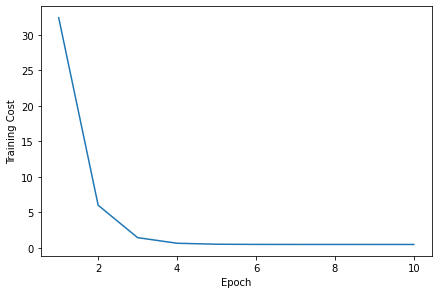

In [30]:
lrmodel = TfLinreg()
training_costs = lrmodel.fit(x_train, y_train)

import matplotlib.pyplot as plt
plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training Cost')
plt.show()

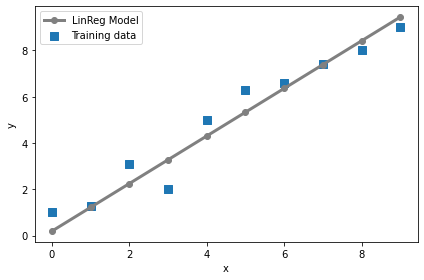

In [31]:
plt.scatter(x_train, y_train, marker='s', s=50, label='Training data')
plt.plot(range(x_train.shape[0]), lrmodel.predict(x_train),
         color='gray', marker='o', markersize=6, linewidth=3, label='LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()